Aviation Data Exploration Data
By: Corey Vorsanger

This jupyter notebook shows the motivation for my final project in COMP 3006. It demonstrtates the capabilities of the companion python script file. In this notebook we explore data taken from the Air Traffic Activity System(ATADS) made publically available by the FAA. This data is taken as far back as 1989 and shows airport operations (take offs and landings) for each airport in the U.S. I currently work at one such airport, Falcon Field Airport in Mesa, AZ. In this notebook I hope to answer.

1) Trends in type of operations at Falcon Field
2) Trends in General Aviation
3) Impact of COVID-19 as it pertains to type and region of airport

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import Aviation_Analysis as AA
import folium
import Covid

Falcon Field Airport is General Aviation Airport in Mesa, AZ. General Aviation just means that the airport services mostly non-commercial aviation needs. 

In [50]:
folium.Map(location=[33.4574, -111.7274], zoom_start=13)

Let's look at the type of operations we have a falcon field airport. An operation is either a take off and landing. We will be using the Aviation_Analysis.py module.

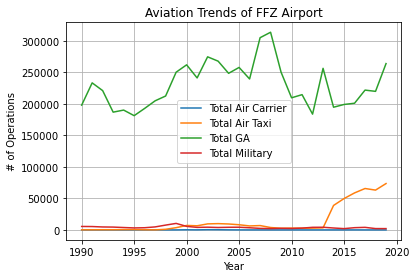

In [51]:
ops=AA.import_ops_data()
airports = AA.import_airport_info()
data=pd.merge(ops, airports, left_on='Facility', right_on='Abbr')
FFZ = AA.data_option(data, 'FFZ', 'Facility')
AA.plot_trends_data(FFZ,'FFZ', 'Airport')

This can be comaprared to what we see for the Denver Airport

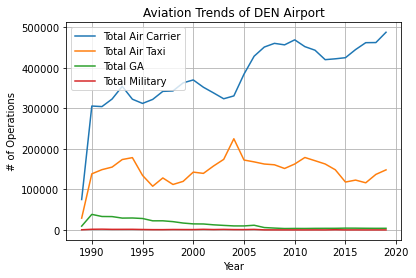

In [52]:
data=pd.merge(ops, airports, left_on='Facility', right_on='Abbr')
DEN = AA.data_option(data, 'DEN', 'Facility')
AA.plot_trends_data(DEN,'DEN', 'Airport')

The graphs are much different. Denver Airport does vastly more Air Carrier (Commercial, i.e. Southwest, American, etc.) operations then anything else. Falcon Field unsurprisingly, does mostly General Aviation Airport. From the Falcon Field graph I can tell that General Aviation at Falcon Field has been increasing starting at about 2013. I would not expect that trend to continue in 2020 due ti COVID-19.

One might be surprised to know that General Aviation accounts for much of the operations in the U.S. To illustrate this lets look at operations in Colorado and the
Western Pacific region.


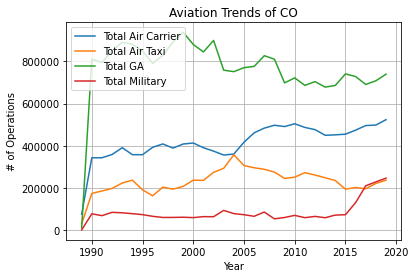

In [53]:
data=pd.merge(ops, airports, left_on='Facility', right_on='Abbr')
CO = AA.data_option(data, 'CO', 'State')
AA.plot_trends_data(CO,'CO', 'State')

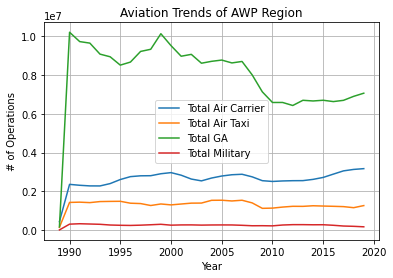

In [54]:
data=pd.merge(ops, airports, left_on='Facility', right_on='Abbr')
AWP = AA.data_option(data, 'AWP', 'Region')
AA.plot_trends_data(AWP,'AWP', 'Region')

As can be seen from the graphs above, General Aviation dominates. However, there seems to be a slight decrease since 2000.

I am interested to see hoe Falcon Field(FFZ) comapres to two nearby competitors, Deer Valley Airport(DVT) and Chandler Airport(CHD).

In [55]:
m = folium.Map(location=[33.4574, -111.7274], zoom_start=9)
folium.Marker(location=[33.4574, -111.7274], popup='Falcon Field Airport', icon=folium.Icon(color='blue')).add_to(m)
folium.Marker(location=[33.6843, -112.0829], popup='Deer Valley Airport', icon=folium.Icon(color='orange')).add_to(m)
folium.Marker(location=[33.2716, -111.8133], popup='Chandler Airport', 
icon=folium.Icon(color='green')).add_to(m)

m

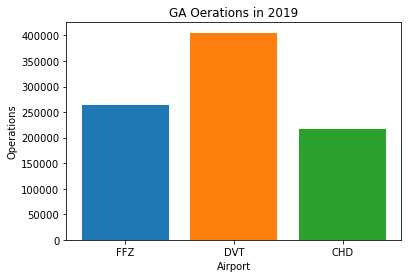

In [56]:
data=pd.merge(ops, airports, left_on='Facility', right_on='Abbr')
DVT = AA.data_option(data, 'DVT', 'Facility')

data=pd.merge(ops, airports, left_on='Facility', right_on='Abbr')
CHD = AA.data_option(data, 'CHD', 'Facility')

plt.bar('FFZ', FFZ.loc[2019]['Total GA'])
plt.bar('DVT', DVT.loc[2019]['Total GA'])
plt.bar('CHD', CHD.loc[2019]['Total GA'])
plt.xlabel('Airport')
plt.ylabel('Operations')
plt.title('GA Oerations in 2019')
plt.show()

Wow Deer Valley Airport is doing really well! They do consistantly rank as one of the best airport in the nation however.

I also wanted to see the impact of COVID-19 on aviation. For instance, at Falcon Field we did not experience to large of a drop off. Commercial airports where well documented as having huge drop offs. For instance lets look at Falcon Field Airport and at Denver International.

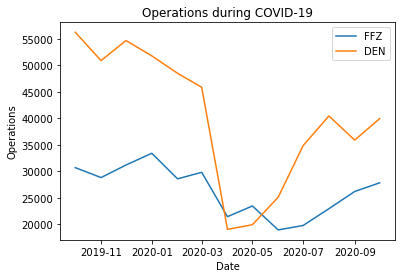

In [57]:
df=Covid.import_data()
df['Total'] = df['Total Air Carrier'] + df['Total Air Taxi'] + df['Total GA'] + df['Total Military']
FFZ = df[df['Facility'] == 'FFZ']
DEN = df[df['Facility'] == 'DEN']
plt.plot(FFZ.Date, FFZ.Total, Label ='FFZ')
plt.plot(DEN.Date, DEN.Total, Label='DEN')
plt.ylabel('Operations')
plt.xlabel('Date')
plt.legend()
plt.title('Operations during COVID-19')
plt.show()

As you can see Denver had a much bigger drop off. Lets look at the combination of every airport. The below section is done by binning each airport by the amount of General Aviation operations they do as a percentage of total operation. Bins are then compared.

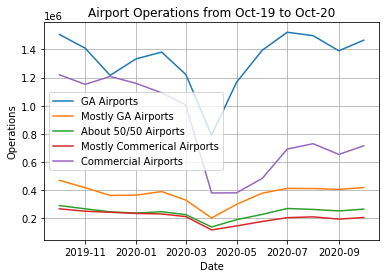

In [58]:
ops = Covid.ops_percentages(data[data['Calendar Year']==2019])
df = pd.merge(df, ops, on='Facility')
df['Section'] = df.apply(Covid.section_airports, axis=1)
df = df.groupby(['Section','Date']).sum()
df['Total'] = df['Total GA'] + df ['Total Air Carrier'] 
Covid.plot_monthly_trends(df)

The results clearly show that both commercial and general aviation airports were hit. It would be good to normalize this graph. The Below graph uses numbers from October 2019 to normalize numbers. Percentage of operations is then shown.

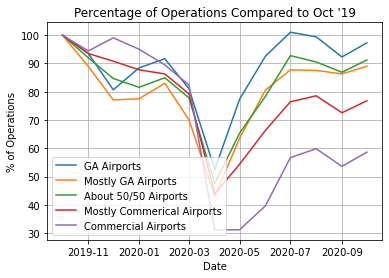

In [59]:
Covid.plot_percentages(df)

Commercial Aviation was indeed hit the hardest. General Aviation took a hit but has seens recovered well.

Still the Falcon Field appears to not be as hit as hard as other general aviation airports. Lets look at the percentage dip in operation in April 2020 (As that is the low point above).

In [60]:
a = (1-(FFZ[FFZ.Date == '2020-04-01']['Total'].item()/FFZ[FFZ.Date == '2019-10-01']['Total'].item())) * 100
GA= df.loc[1]
b = (1-(GA.loc['2020-04-01']['Total'].item()/GA.loc['2019-10-01']['Total'].item())) * 100
print('Falcon Field saw a decrease of {}% in operations'.format(round(a,2)))
print('On Average GA airpoets saw a decrease of {}% in operations'.format(round(b,2)))

Falcon Field saw a decrease of 30.2% in operations
On Average GA airpoets saw a decrease of 47.49% in operations


Falcon Field indeed did well during COVID-19. Doing so by almost 18 percentage points!

I hope you found this notebook interesting. If not, I hope it at least adequetly showcased the Covid.py and Aviation_Analysis.py modules i made for this class. Aviation_Analysis can be run from the command line. Please use the -h flag to get more informatipon.

Thank you for a great class. I learned alot especially with Linux commands. Have a great Thanksgiving.